In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import rawpy


fn = '2d_lonlat_1.nc'

ds = nc.Dataset(fn)

In [2]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)
    history: Tue Oct 11 14:06:25 2016: cdo seltimestep,1800 2d_6hours.nc 2d_lonlat_1.nc
Tue Oct 11 11:44:45 2016: cdo merge /home/dkrz/k202073/work/ICON/scivis/2d_cloud_6hours.nc /home/dkrz/k202073/work/ICON/scivis/2d_surface1_6hours.nc /home/dkrz/k202073/work/ICON/scivis/2d_surface2_6hours.nc surface2.nc /home/dkrz/k202073/work/ICON/scivis/2d_6hours.nc
Mon Oct 10 10:42:33 2016: cdo setgrid,grid2d.txt surface.nc surface2.nc
Tue May 24 14:04:36 2016: cdo setgrid,grid.txt surface.nc nvidia2/surface.nc
Tue May 24 11:33:12 2016: cdo selvar,z_ifc qrs.nc nvidia2/surface.nc
Wed May 04 09:54:48 2016: cdo seltimestep,1000/1400 qrs_24.nc nvidia/qrs.nc
Mon Jan 18 13:11:10 2016: cdo merge qrs_24_new.nc tmp2.nc qrs_24.nc
Mon Jan 18 13:06:13 2016: cdo expr,z_ifc=(z_ifc<0)?1:z_ifc tmp.nc qrs_24.nc
Thu Jan 14 17:15:41 2016: cdo merge qrs_24_new.

C:\Users\wangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


In [3]:
print(ds.__dict__)

{'CDI': 'Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)', 'history': 'Tue Oct 11 14:06:25 2016: cdo seltimestep,1800 2d_6hours.nc 2d_lonlat_1.nc\nTue Oct 11 11:44:45 2016: cdo merge /home/dkrz/k202073/work/ICON/scivis/2d_cloud_6hours.nc /home/dkrz/k202073/work/ICON/scivis/2d_surface1_6hours.nc /home/dkrz/k202073/work/ICON/scivis/2d_surface2_6hours.nc surface2.nc /home/dkrz/k202073/work/ICON/scivis/2d_6hours.nc\nMon Oct 10 10:42:33 2016: cdo setgrid,grid2d.txt surface.nc surface2.nc\nTue May 24 14:04:36 2016: cdo setgrid,grid.txt surface.nc nvidia2/surface.nc\nTue May 24 11:33:12 2016: cdo selvar,z_ifc qrs.nc nvidia2/surface.nc\nWed May 04 09:54:48 2016: cdo seltimestep,1000/1400 qrs_24.nc nvidia/qrs.nc\nMon Jan 18 13:11:10 2016: cdo merge qrs_24_new.nc tmp2.nc qrs_24.nc\nMon Jan 18 13:06:13 2016: cdo expr,z_ifc=(z_ifc<0)?1:z_ifc tmp.nc qrs_24.nc\nThu Jan 14 17:15:41 2016: cdo merge qrs_24_new.nc zifc_neu_surface.nc qrs_24.nc\nThu Jan 14 17:12:51 2016: cdo setzaxis,zaxi

C:\Users\wangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


In [4]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 1429
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 1556
<class 'netCDF4._netCDF4.Dimension'>: name = 'height_2', size = 1
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1


C:\Users\wangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [5]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (1429,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (1556,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 height_2(height_2)
    standard_name: height
    long_name: height
    units: m
    positive: up
    axis: Z
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    units: days since 2013-4-26 15:00:00
    calendar: proleptic_gregorian
    axis: T
unlimited dimensions: time
current shape = (1,)
filling on, default _FillVa

C:\Users\wangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [6]:
z_ifc = ds['z_ifc'][:]
print(type(z_ifc))
print(z_ifc.shape)
print(z_ifc.mask)
print(np.isnan(z_ifc))
print(np.isnan(z_ifc).any())
print(np.min(z_ifc))
print(np.max(z_ifc))


z_ifc = z_ifc.filled()

<class 'numpy.ma.core.MaskedArray'>
(1556, 1429)
False
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
False
0.0
2443.7903


C:\Users\wangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


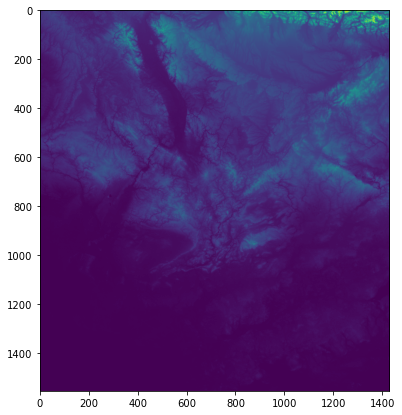

In [20]:
plt.figure(figsize=(7,7))
plt.imshow(z_ifc)
plt.show()

In [34]:
from PIL import Image

# scale image and convert to 8-bit int
max_value = np.max(z_ifc)
scaled = z_ifc / max_value * 255
scaled = scaled.astype('uint8')

img = Image.fromarray(scaled, 'L')
img = img.resize((512, 512))
img.show()

img.save('heightmap.png', 'PNG')

In [4]:
df=pd.read_csv('terrain_data.csv', header=None)

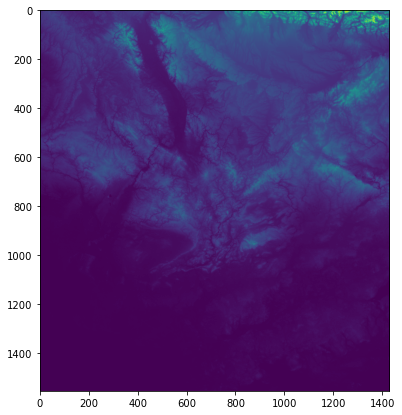

In [6]:
plt.figure(figsize=(7,7))
plt.imshow(df)
plt.show()